In [364]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [365]:
import warnings
warnings.filterwarnings('ignore')

In [366]:
#Importing the Dataset
df = pd.read_csv('solar-dataset.csv')
print("Shape of the Dataset: ", df.shape)
df.head()

Shape of the Dataset:  (2920, 16)


,Day of Year,Year,Month,Day,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
0,245,2008,9,1,1,False,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,245,2008,9,1,4,False,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,245,2008,9,1,7,True,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,245,2008,9,1,10,True,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,245,2008,9,1,13,True,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


## Preprocessing

In [367]:
df[df['Power Generated'] == 0]

,Day of Year,Year,Month,Day,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
0,245,2008,9,1,1,False,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,245,2008,9,1,4,False,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
7,245,2008,9,1,22,False,0.759640,69,28,7.5,0,10.0,49,6.0,29.86,0
8,246,2008,9,2,1,False,0.862113,72,29,6.8,0,10.0,67,6.0,29.86,0
9,246,2008,9,2,4,False,0.630155,72,29,6.8,0,10.0,49,0.0,29.87,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2905,242,2009,8,30,4,False,0.625798,61,27,15.8,1,10.0,90,13.0,29.84,0
2911,242,2009,8,30,22,False,0.753512,61,27,15.8,4,10.0,90,13.0,29.87,0
2912,243,2009,8,31,1,False,0.857875,63,27,13.9,4,10.0,93,11.0,29.86,0
2913,243,2009,8,31,4,False,0.627401,63,27,13.9,4,10.0,90,11.0,29.86,0


In [334]:
df = df[df['Average Wind Speed (Period)'].notnull()]  #Dropped all the Null Rows

In [335]:
#Doing Date Time conversion since we are dealing with timeseries data

df['Month'] = df['Month'].apply(lambda x: '{0:0>2}'.format(x))
df['Day'] = df['Day'].apply(lambda x: '{0:0>2}'.format(x))
df = df.astype({'Year':'string', 'Month':'string', 'Day': 'string'})
df['Timestamp'] = df['Year']+ '-' + df['Month']+ '-' + df['Day']
df.head()

,Day of Year,Year,Month,Day,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated,Timestamp
0,245,2008,09,01,1,False,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0,2008-09-01
1,245,2008,09,01,4,False,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0,2008-09-01
2,245,2008,09,01,7,True,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418,2008-09-01
3,245,2008,09,01,10,True,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477,2008-09-01
4,245,2008,09,01,13,True,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069,2008-09-01


In [336]:
#Dropping all the duplicate Values here
df = df.drop_duplicates(keep=False, ignore_index=True)
df.shape  #No Dupllicate Values

(2919, 17)

In [337]:
#Converting colum's datatype to Datetime object from String
df['Timestamp'] = pd.to_datetime(df['Timestamp'], yearfirst=True, format="%Y-%m-%d")

In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Day of Year                           2919 non-null   int64         
 1   Year                                  2919 non-null   string        
 2   Month                                 2919 non-null   string        
 3   Day                                   2919 non-null   string        
 4   First Hour of Period                  2919 non-null   int64         
 5   Is Daylight                           2919 non-null   bool          
 6   Distance to Solar Noon                2919 non-null   float64       
 7   Average Temperature (Day)             2919 non-null   int64         
 8   Average Wind Direction (Day)          2919 non-null   int64         
 9   Average Wind Speed (Day)              2919 non-null   float64       
 10  

In [339]:
df.sort_values('Timestamp', inplace=True) #Sorting Values by Timestamp, since we are dealing with timeseries data

## Train, Validation and Testing Split

In [340]:
from sklearn.model_selection import train_test_split

In [341]:
train, val = train_test_split(df, test_size=0.30, shuffle=False)
val, test = train_test_split(val, test_size=0.60, shuffle=False)

In [342]:
print("Size of Training Set:", train.shape)
print("Size of Val Set", val.shape)
print("Size of Test Set", test.shape)

Size of Training Set: (2043, 17)
Size of Val Set (350, 17)
Size of Test Set (526, 17)


## EDA (Exploratory Data Analysis)
Here we have performed optimization studies and derived features from it

In [343]:
df.describe()

,Day of Year,First Hour of Period,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,183.282631,11.501542,0.503327,58.468996,24.957862,10.099486,1.987667,9.559609,73.505995,10.129154,30.017712,6982.182939
std,105.751253,6.875714,0.298069,6.842318,6.912203,4.837128,1.412220,1.380290,15.073974,7.261547,0.142006,10313.330078
min,1.000000,1.000000,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,92.000000,5.500000,0.232061,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,183.000000,13.000000,0.479241,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,275.000000,17.500000,0.739559,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12725.000000
max,366.000000,22.000000,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


Month Wise Distribution of Various Data


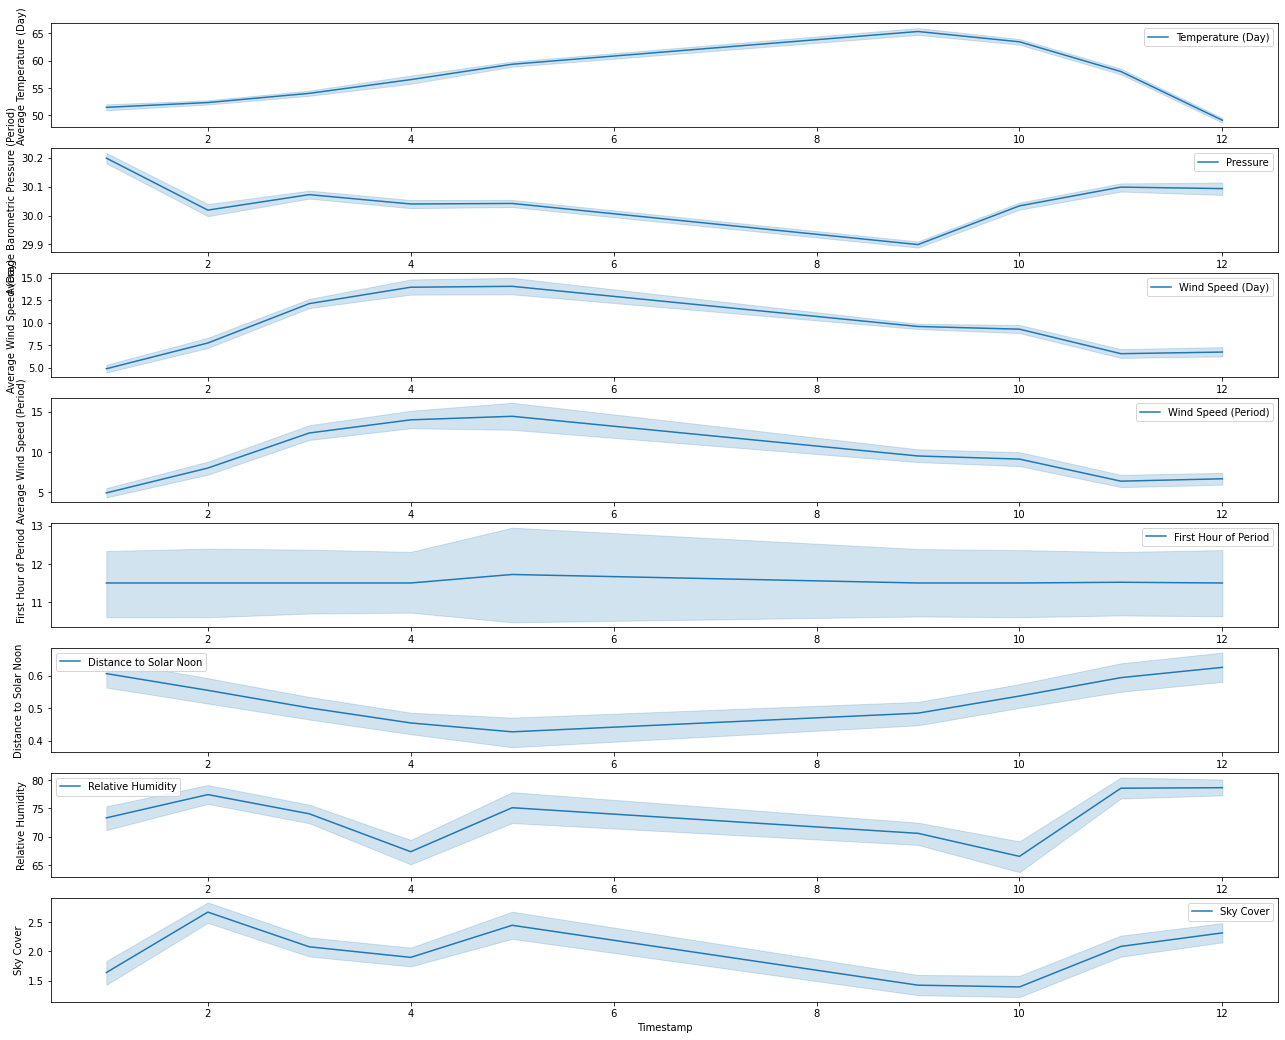

In [344]:
import matplotlib .pyplot as plt
print("Month Wise Distribution of Various Data")
f, ax = plt.subplots(8, 1, figsize=(22,18))
sns.lineplot(x=train['Timestamp'].dt.month, y=train['Average Temperature (Day)'], label='Temperature (Day)', ax=ax[0])
sns.lineplot(x=train['Timestamp'].dt.month, y=train['Average Barometric Pressure (Period)'], label='Pressure', ax=ax[1])
sns.lineplot(x=train['Timestamp'].dt.month, y=train['Average Wind Speed (Day)'], label='Wind Speed (Day)', ax=ax[2])
sns.lineplot(x=train['Timestamp'].dt.month, y=train['Average Wind Speed (Period)'], label='Wind Speed (Period)', ax=ax[3])
sns.lineplot(x=train['Timestamp'].dt.month, y=train['First Hour of Period'], label='First Hour of Period', ax=ax[4])
sns.lineplot(x=train['Timestamp'].dt.month, y=train['Distance to Solar Noon'], label='Distance to Solar Noon', ax=ax[5])
sns.lineplot(x=train['Timestamp'].dt.month, y=train['Relative Humidity'], label='Relative Humidity', ax=ax[6])
sns.lineplot(x=train['Timestamp'].dt.month, y=train['Sky Cover'], label='Sky Cover', ax=ax[7])
plt.show()

Power Generated


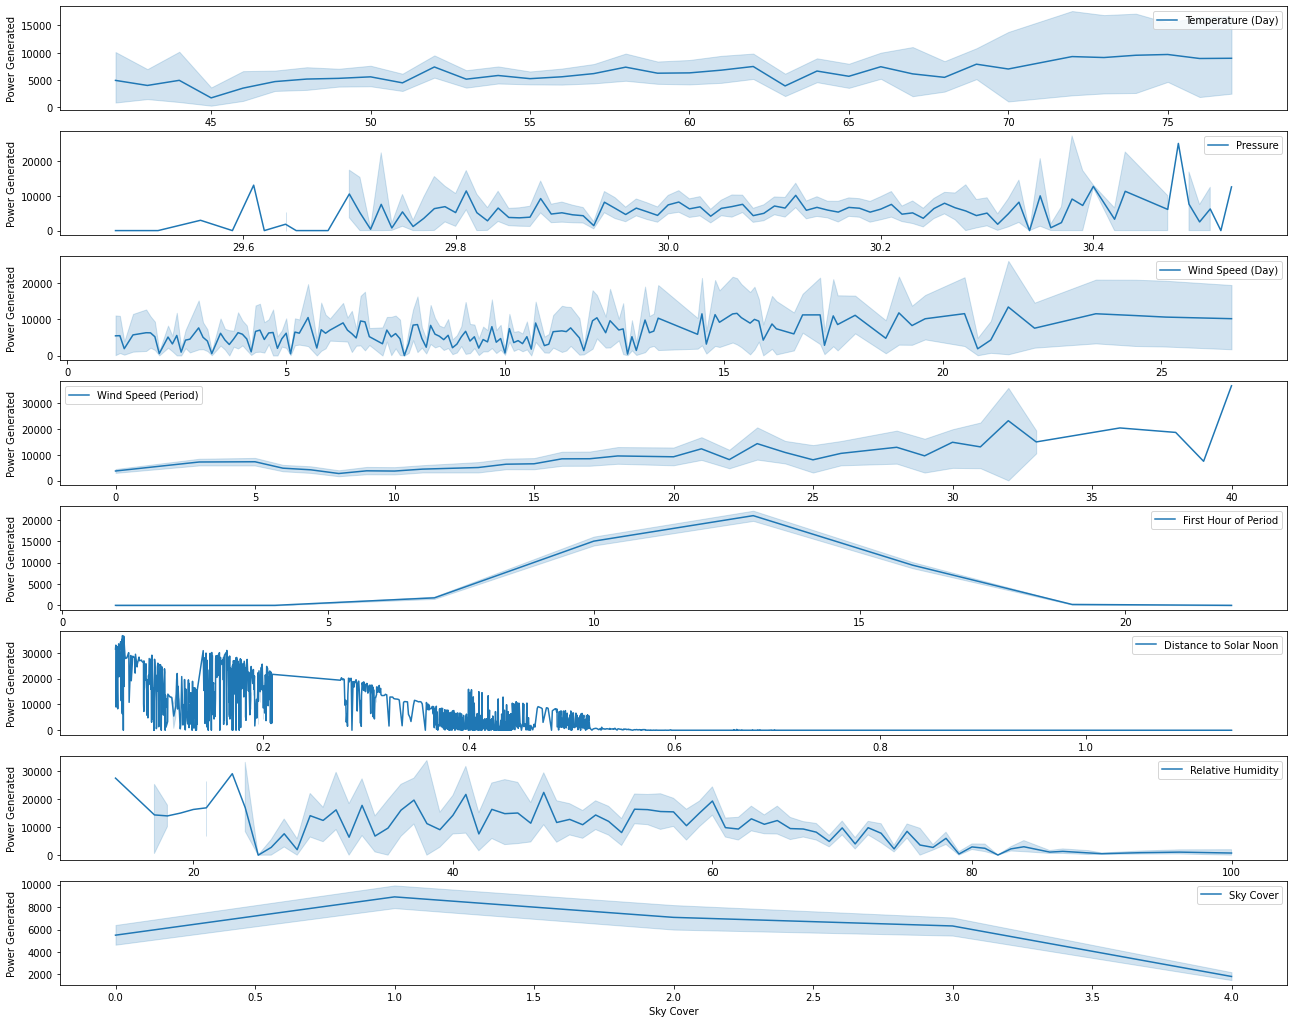

In [345]:
import matplotlib .pyplot as plt
print("Power Generated")
f, ax = plt.subplots(8, 1, figsize=(22,18))
sns.lineplot(y=train['Power Generated'], x=train['Average Temperature (Day)'], label='Temperature (Day)', ax=ax[0])
sns.lineplot(y=train['Power Generated'], x=train['Average Barometric Pressure (Period)'], label='Pressure', ax=ax[1])
sns.lineplot(y=train['Power Generated'], x=train['Average Wind Speed (Day)'], label='Wind Speed (Day)', ax=ax[2])
sns.lineplot(y=train['Power Generated'], x=train['Average Wind Speed (Period)'], label='Wind Speed (Period)', ax=ax[3])
sns.lineplot(y=train['Power Generated'], x=train['First Hour of Period'], label='First Hour of Period', ax=ax[4])
sns.lineplot(y=train['Power Generated'], x=train['Distance to Solar Noon'], label='Distance to Solar Noon', ax=ax[5])
sns.lineplot(y=train['Power Generated'], x=train['Relative Humidity'], label='Relative Humidity', ax=ax[6])
sns.lineplot(y=train['Power Generated'], x=train['Sky Cover'], label='Sky Cover', ax=ax[7])
plt.show()

## Feature Selection

In [346]:
corr = train[['Is Daylight', 'Distance to Solar Noon', 'Average Temperature (Day)', 
'Average Wind Direction (Day)', 'Average Wind Speed (Day)', 'Sky Cover','Visibility', 'Relative Humidity', 'Average Wind Speed (Period)','Average Barometric Pressure (Period)', 'Power Generated']].corr()

<AxesSubplot:>

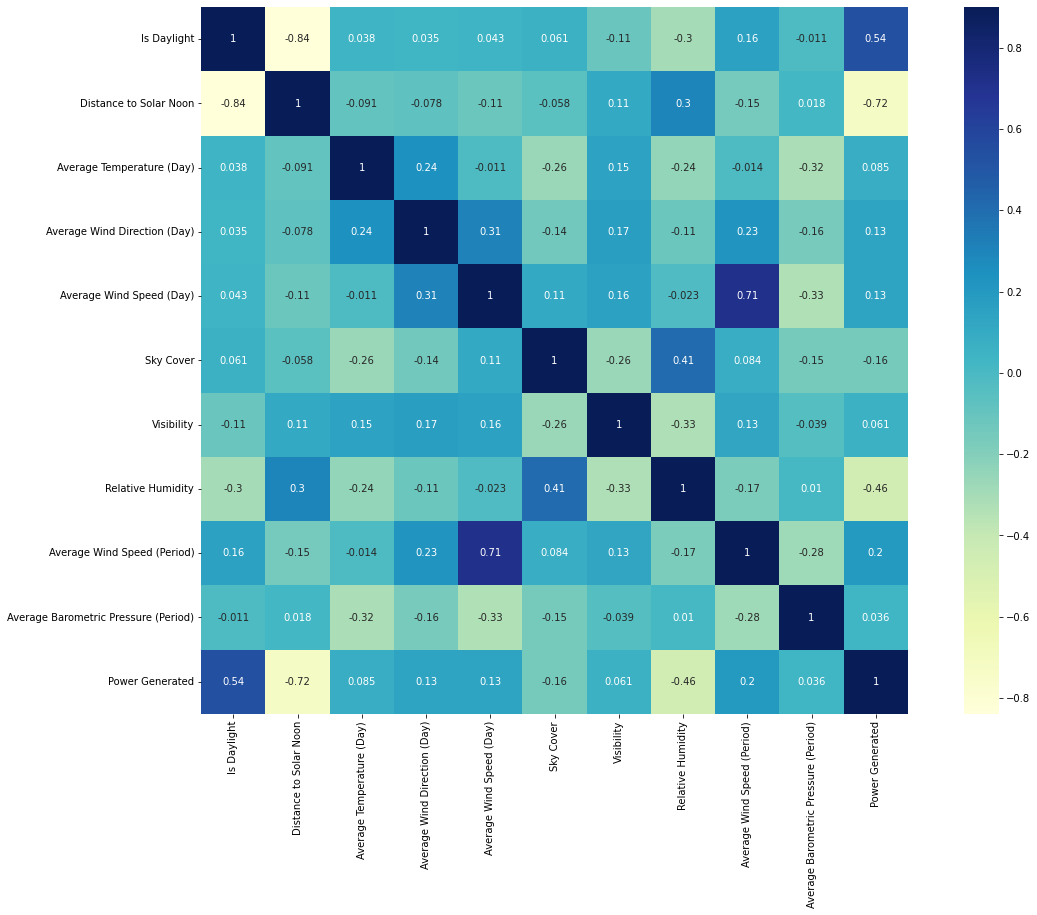

In [347]:
fig, ax = plt.subplots(figsize=(8,8))
fig.set_size_inches(20,13)
sns.heatmap(corr, vmax=0.9, square=True, ax=ax, annot=True, cmap="YlGnBu")

In [348]:
x_train = train[['Day of Year', 'First Hour of Period', 'Is Daylight', 'Distance to Solar Noon', 
'Average Temperature (Day)', 'Average Wind Direction (Day)', 'Average Wind Speed (Day)', 'Sky Cover','Visibility', 'Relative Humidity', 'Average Wind Speed (Period)','Average Barometric Pressure (Period)']].values
x_train = np.asarray(x_train).astype('float32')
y_train = train['Power Generated'].values

x_val = val[['Day of Year', 'First Hour of Period', 'Is Daylight', 'Distance to Solar Noon', 
'Average Temperature (Day)', 'Average Wind Direction (Day)', 'Average Wind Speed (Day)', 'Sky Cover','Visibility', 'Relative Humidity', 'Average Wind Speed (Period)','Average Barometric Pressure (Period)']].values
x_val = np.asarray(x_val).astype('float32')
y_val = val['Power Generated'].values

In [349]:
model_name = []
model_train = []
model_val = []

In [350]:
#Lasso Regression

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

Lasso_reg = Lasso()
parameters = {'alpha':[x for x in [0.0005, 0.001, 0.01, 0.1, 1]]}

Lasso_reg = GridSearchCV(Lasso_reg, param_grid=parameters)
Lasso_reg.fit(x_train, y_train)
print("Best Score Obtained: ", Lasso_reg.best_params_, Lasso_reg.best_score_)

Lasso_reg = Lasso(alpha=1)
Lasso_reg.fit(x_train, y_train)
predicted_train = Lasso_reg.predict(x_train)
predicted_val = Lasso_reg.predict(x_val)

print("Training Set RMSE Score: ",np.sqrt(mean_squared_error(y_train, predicted_train)))
print("Validation Set RMSE Score: ",np.sqrt(mean_squared_error(y_val, predicted_val)))
model_name.append('Lasso Regressor')
model_train.append(np.sqrt(mean_squared_error(y_train, predicted_train)))
model_val.append(np.sqrt(mean_squared_error(y_val, predicted_val)))

Best Score Obtained:  {'alpha': 1} 0.48861233123228287
Training Set RMSE Score:  5672.814783942534
Validation Set RMSE Score:  6864.32664057785


In [351]:
#Decision Tree

from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor()
clf.fit(x_train, y_train)

predicted_train = clf.predict(x_train)
predicted_val = clf.predict(x_val)

print("Training Set RMSE Score: ",np.sqrt(mean_squared_error(y_train, predicted_train)))
print("Validation Set RMSE Score: ",np.sqrt(mean_squared_error(y_val, predicted_val)))
model_name.append("Decision Tree")
model_train.append(np.sqrt(mean_squared_error(y_train, predicted_train)))
model_val.append(np.sqrt(mean_squared_error(y_val, predicted_val)))

Training Set RMSE Score:  0.0
Validation Set RMSE Score:  6166.795176241407


In [352]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

reg = RandomForestRegressor(criterion='squared_error')
reg.fit(x_train, y_train)
predicted_train = reg.predict(x_train)
predicted_val = reg.predict(x_val)

print("Training Set RMSE Score: ",np.sqrt(mean_squared_error(y_train, predicted_train)))
print("Validation Set RMSE Score: ",np.sqrt(mean_squared_error(y_val, predicted_val)))
model_name.append("Random Regressor")
model_train.append(np.sqrt(mean_squared_error(y_train, predicted_train)))
model_val.append(np.sqrt(mean_squared_error(y_val, predicted_val)))

Training Set RMSE Score:  1053.737425512865
Validation Set RMSE Score:  4419.841354496983


In [353]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model, Sequential

In [354]:
model = Sequential()
model.add(Dense(200, activation='relu', kernel_initializer='normal',input_shape=(12,)))
model.add(Dense(200, activation='relu', kernel_initializer='normal'))
model.add(Dense(1,  kernel_initializer='normal'))

model.summary()
model.compile(optimizer='adam', loss='mse')
history = model.fit(x_train, y_train, validation_data = (x_val,y_val), epochs=100)

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_73 (Dense)            (None, 200)               2600      
                                                                 
 dense_74 (Dense)            (None, 200)               40200     
                                                                 
 dense_75 (Dense)            (None, 1)                 201       
                                                                 
Total params: 43,001
Trainable params: 43,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
64/64 [==============================] - 1s 8ms/step - loss: 114537288.0000 - val_loss: 184323584.0000
Epoch 2/100
64/64 [==============================] - 0s 3ms/step - loss: 92126024.0000 - val_loss: 158879808.0000
Epoch 3/100
64/64 [==============================] - 0s 4ms/step - loss: 88988088.00

In [355]:
predicted_train = model.predict(x_train)
predicted_val = model.predict(x_val)

print("Training Set RMSE Score: ",np.sqrt(mean_squared_error(y_train, predicted_train)))
print("Validation Set RMSE Score: ",np.sqrt(mean_squared_error(y_val, predicted_val)))

model_name.append("Artifical Neural Network")
model_train.append(np.sqrt(mean_squared_error(y_train, predicted_train)))
model_val.append(np.sqrt(mean_squared_error(y_val, predicted_val)))

Training Set RMSE Score:  3891.623120902313
Validation Set RMSE Score:  4966.243762520043


In [356]:
#XG Boost Regressor

import xgboost as xgb

clf = xgb.XGBRegressor()
clf.fit(x_train, y_train)
predicted_train = clf.predict(x_train)
predicted_val = clf.predict(x_val)
print("Training Set RMSE Score: ",np.sqrt(mean_squared_error(y_train, predicted_train)))
print("Validation Set RMSE Score: ",np.sqrt(mean_squared_error(y_val, predicted_val)))

model_name.append("XG Boost")
model_train.append(np.sqrt(mean_squared_error(y_train, predicted_train)))
model_val.append(np.sqrt(mean_squared_error(y_val, predicted_val)))

Training Set RMSE Score:  222.5460105018753
Validation Set RMSE Score:  4921.690671348909


In [357]:
model_compare = pd.DataFrame({"Model":model_name, "Training RMSE":model_train, "Validation RMSE":model_val})
model_compare

,Model,Training RMSE,Validation RMSE
0,Lasso Regressor,5672.814784,6864.326641
1,Decision Tree,0.000000,6166.795176
2,Random Regressor,1053.737426,4419.841354
3,Artifical Neural Network,3891.623121,4966.243763
4,XG Boost,222.546011,4921.690671


In [358]:
clf = xgb.XGBRegressor()
clf.fit(x_train, y_train)
predicted_train = clf.predict(x_train)
predicted_val = clf.predict(x_val)
print("Training Set RMSE Score: ",np.sqrt(mean_squared_error(y_train, predicted_train)))
print("Validation Set RMSE Score: ",np.sqrt(mean_squared_error(y_val, predicted_val)))

Training Set RMSE Score:  222.5460105018753
Validation Set RMSE Score:  4921.690671348909


#### Best Model Selection Criteria

Here, we can choose XG Boost as the best model out of rest as it performs well on test as well as the validation set. The lower the RMSE score the better the model has performed.

## Test Set Evalutaion

In [359]:
x_test = test[['Day of Year', 'First Hour of Period', 'Is Daylight', 'Distance to Solar Noon', 
'Average Temperature (Day)', 'Average Wind Direction (Day)', 'Average Wind Speed (Day)', 'Sky Cover','Visibility', 
'Relative Humidity', 'Average Wind Speed (Period)','Average Barometric Pressure (Period)']].values
x_test = np.asarray(x_test).astype('float32')
y_test = test['Power Generated'].values

In [360]:
predicted_test = clf.predict(x_test)
print("Training Set RMSE Score: ",np.sqrt(mean_squared_error(y_test, predicted_test)))

Training Set RMSE Score:  3532.673421920345


In [361]:
predictedValues = pd.DataFrame({"Power Generated Original":y_test, "Power Generated Predicted": predicted_test})
predictedValues[predictedValues<0] = 0
predictedValues

,Power Generated Original,Power Generated Predicted
0,8376,8437.551758
1,27771,27321.703125
2,32483,30004.324219
3,20505,17694.564453
4,1950,3186.158691
...,...,...
521,677,559.591614
522,0,0.000000
523,0,0.000000
524,464,478.563568


In [363]:
#Deploying the Model

import pickle
file_name = "xgb_reg_model_power.pkl"

# save
pickle.dump(clf, open(file_name, "wb"))

# Save the CSV

test.to_csv('simulation_values.csv')
